In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
import numpy as np
import statistics

In [ ]:
# Has the network latency gone up since we switched internet service providers?

H_0: = The network latency has not changed since we switched internet service providers

Hα = The network latency has increased since we switched internet service providers


True Positive = determine the network latency has increased and it has

True Negative = determine the network latency has stayed the same or decreased and it has


Type I error = determine the network latency has increased when it actually stayed the same or decreased

Type II error = determine the network latency has decreaded or stayed the same when it actually hass increased


In [ ]:
# Is the website redesign any good?

H_0 = There is no change in daily website visits or visits have decreased since the redesign

Hα = There has been an increase in website visits since redesign


True Positive = detemine the number of daily visits has increased and it has

True Negative = determine the number of daily visits has stayed the same or decreased and it has


Type I error = determine the number of daily visits has increased when it has actually stayed the same or decrease

Type II error = detremine the number of daily visits has stayed the same or decreased when it actually increased

In [ ]:
# Is our television ad driving more sales?

H_0 = Sales are not greater with new ad

Hα = Sales are greater with new ad


True Positive = determine the sales have increased and they have

True Negative = determine the sales have decreaed or stayed the same and they have


Type I error = detrmine the sales have increased when they decreased or remained the same

Type II error = determine the sales have remained the same or decreased when they have actually increased

In [ ]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

 H_0: The average time it takes to sell home at office #1 is the same as (==) office #2
 Hα: The average time it takes to sell home at office #1 is not the same (!=) office #2

In [5]:
α = 0.05

In [6]:
t, p = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False)
t, p

(-2.7091418459143854, 0.00811206270346016)

In [7]:
if p < α:
    print("We reject the null hypothesis.")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis.


In [9]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [10]:
mpg.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [20]:
mpg.manufacturer.unique()


array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [ ]:
# Load the mpg dataset and use it to answer the following questions:

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?


In [ ]:
# H_0: There is no fuel-efficiency difference between 2008 and 1999 cars
# Hα: There is a difference in fuel-efficiency between 2008 and 1999 cars

In [23]:
α = 0.05
mpg['avg_eff'] = stats.hmean(mpg[['cty', 'hwy']], axis=1)
mpg.head()


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [24]:
fe_2008 = mpg[mpg.year == 2008].avg_eff
fe_1999 = mpg[mpg.year == 1999].avg_eff

In [25]:
fe_2008.count() # big enough sample size

117

In [26]:
fe_1999.count()

117

In [27]:
fe_2008.var() # close enough variance

22.550836772260343

In [28]:
fe_1999.var()

25.850396545865912

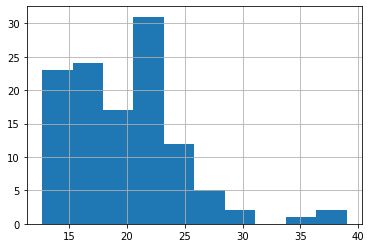

In [33]:
fe_1999.hist()
plt.show()

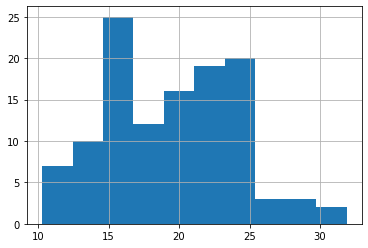

In [34]:
fe_2008.hist()
plt.show()

In [71]:
#H_0
#Hα
stats.levene(fe_1999, fe_2008)

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [69]:
t, p = stats.ttest_ind(fe_1999, fe_2008)
t, p

(0.3011962975077886, 0.7635345888327115)

In [31]:
if p < α and t > 0:
    print('Reject Null Hypothesis')
else:
    print('Fail to Reject Null Hypothesis')

Fail to Reject Null Hypothesis


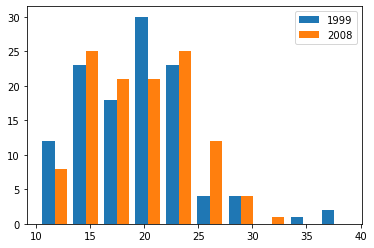

In [64]:
plt.hist([fe_1999, fe_2008], label=['1999', '2008'])
plt.legend(loc="upper right")
plt.show()

In [32]:
fe_1999.mean(), fe_2008.mean()

(19.68238764869729, 19.488662986569054)

In [ ]:
# Are compact cars more fuel-efficient than the average car?

In [ ]:
# H_0: Compact cars are equal(=) or less (<) fuel-efficient than average cars.
# Hα: Compact cars are more (>) fuel-efficient than average cars

In [40]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_eff
pop_mean = mpg.avg_eff.mean()
α = 0.05

In [41]:
pop_mean

19.585525317633177

In [43]:
fe_compact.mean()

23.500416808701296

In [44]:
t, p = stats.ttest_1samp(fe_compact, pop_mean)
t, p

(7.512360093161354, 1.5617666348807727e-09)

In [45]:
if (p/2 < α) and t > 0:
    print('Reject Null Hypothesis')
else:
    print('Failed to Reject Null Hypothesis')

Reject Null Hypothesis


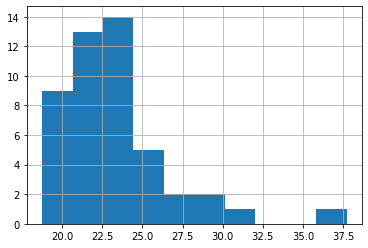

In [46]:
fe_compact.hist()
plt.show()

In [ ]:
# Do manual cars get better gas mileage than automatic cars?

In [ ]:
# H_0: There is no difference in gas mileage between manual and automatic cars(!=)
# Hα: Manual cars get better mileage than automatic cars(==)
    
α = 0.05

In [47]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [48]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [50]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_eff
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_eff

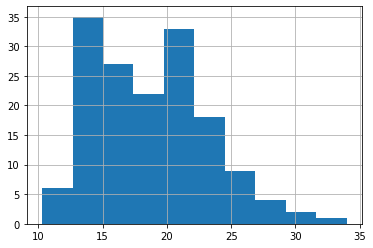

In [51]:
fe_auto.hist()
plt.show()

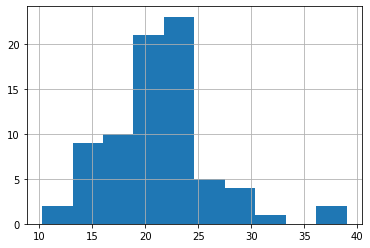

In [52]:
fe_manual.hist()
plt.show()

In [53]:
fe_auto.var() # similar variance

20.428279095002054

In [54]:
fe_manual.var() # similar variance

25.665633639828275

In [72]:
#H_0: variance is different 
#Hα: variance is the same
stats.levene(fe_auto, fe_manual)

if p < α:
    print('Reject the Null')
else:
    print('Fail to Reject')

Fail to Reject


In [56]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2

(4.652577547151351, 2.7552323050220026e-06)

In [57]:
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=False)
t, p/2

(4.47444321386703, 7.99035135103976e-06)

In [58]:
if (p/2 < α) and t > 0:
    print('Reject the Null Hypothesis')
else:
    print('Failed to Reject the Null Hypothesis')

Reject the Null Hypothesis


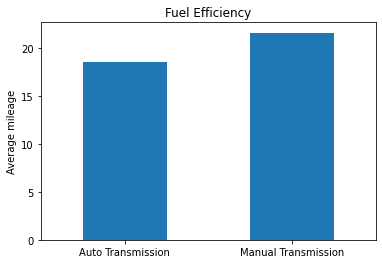

In [63]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')
mpg.groupby('transmission_type').avg_eff.mean().plot.bar()
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Average mileage')
plt.title('Fuel Efficiency')
plt.show()